# Importing library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam

# Paths for training and test datasets


In [2]:
train_data_folder = 'data/Train'
test_data_folder = 'data/Test'

# Load images and labels from the training dataset


In [3]:

# Parameters
num_classes = 43
input_shape = (30, 30, 3)  # Image shape after resizing

train_data = []
train_labels = []

for label in range(num_classes):
    label_folder = os.path.join(train_data_folder, str(label))
    for image_name in os.listdir(label_folder):
        try:
            img_path = os.path.join(label_folder, image_name)
            image = Image.open(img_path).resize((30, 30))
            train_data.append(np.array(image))
            train_labels.append(label)
        except:
            print(f"Error loading image {image_name} in folder {label}")

# Convert lists to numpy arrays

In [4]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

# Normalize the data

In [5]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, 3)).reshape(train_data.shape)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# One-hot encoding labels
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

# Building the Model architecture and Compile the Model

In [6]:
model = Sequential()
model.add(Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=input_shape))  # Reduced filters
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))  # Dropout rate reduced to 0.2

# Second convolutional block - change filter size and kernel size
model.add(Conv2D(filters=49, kernel_size=(3, 3), activation='relu'))  # Reduced filters, smaller kernel
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Third convolutional block - added a third layer and reduced filter size
model.add(Conv2D(filters=73, kernel_size=(3, 3), activation='relu'))  # Reduced filters, kernel size (3,3)
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten the features
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))  # Reduced neurons in fully connected layer
model.add(Dropout(0.4))


model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

/Users/neelpatel/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 25)     │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 49)     │        11,074 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 49)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 49)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 73)       │        32,266 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 73)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 73)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 292)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        75,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,099 (508.20 KB)

 Trainable params: 130,099 (508.20 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model


In [7]:
epochs = 25
batch_size=100
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/25
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1025 - loss: 3.3918 - val_accuracy: 0.4318 - val_loss: 1.9602
Epoch 2/25
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4324 - loss: 1.8621 - val_accuracy: 0.7377 - val_loss: 0.9364
Epoch 3/25
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6469 - loss: 1.0964 - val_accuracy: 0.8785 - val_loss: 0.5048
Epoch 4/25
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7755 - loss: 0.7079 - val_accuracy: 0.9170 - val_loss: 0.3296
Epoch 5/25
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8324 - loss: 0.5282 - val_accuracy: 0.9424 - val_loss: 0.2474
Epoch 6/25
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8660 - loss: 0.4211 - val_accuracy: 0.9588 - val_loss: 0.1735
Epoch 7/25
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8928 - loss: 0.3359 - val_accuracy: 0.9684 - val_loss: 0.1421
Epoch 8/25
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9127 - loss: 0.2767 - val_accu

# Plot training history


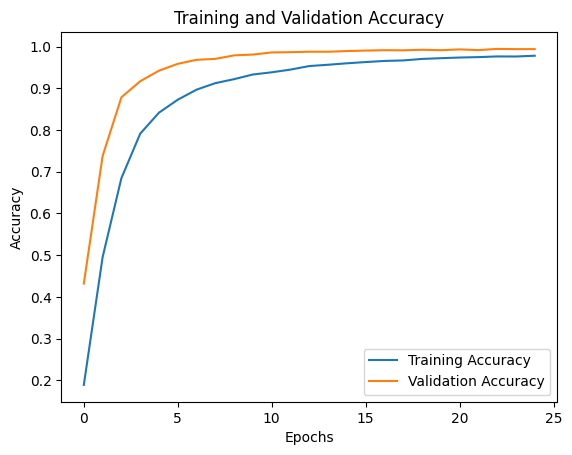

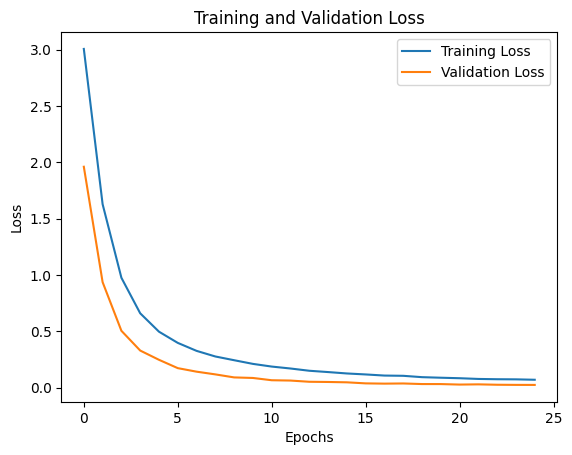

In [8]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load test data

In [9]:
test_data = pd.read_csv('data/Test.csv')
test_images = []
test_labels = test_data['ClassId'].values
image_paths = test_data['Path'].values

for img_path in image_paths:
    # Construct full path using os.path.join only once
    full_img_path = os.path.join('data', img_path.replace('/', os.sep))  # Join 'data' with img_path

    try:
        # Open, resize, and convert image to array
        img = Image.open(full_img_path).resize((30, 30))
        test_images.append(np.array(img))
    except FileNotFoundError:
        print(f"Warning: File not found - {full_img_path}")

X_test = np.array(test_images)
X_test = scaler.transform(X_test.reshape(-1, 3)).reshape(X_test.shape)

# Predictions and Evaluate the Model

In [10]:
# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Evaluate the model
cm = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='macro', zero_division=1)
recall = recall_score(test_labels, y_pred, average='macro', zero_division=1)
f1 = f1_score(test_labels, y_pred, average='macro', zero_division=1)


print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Confusion Matrix:
 [[ 55   1   0 ...   0   0   0]
 [  0 709   2 ...   0   0   0]
 [  0   7 741 ...   0   0   0]
 ...
 [  0   0   0 ...  85   0   0]
 [  0   0   0 ...   0  52   0]
 [  0   0   0 ...   0   0  88]]
Accuracy: 0.96
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


# PREDICTIONS methods

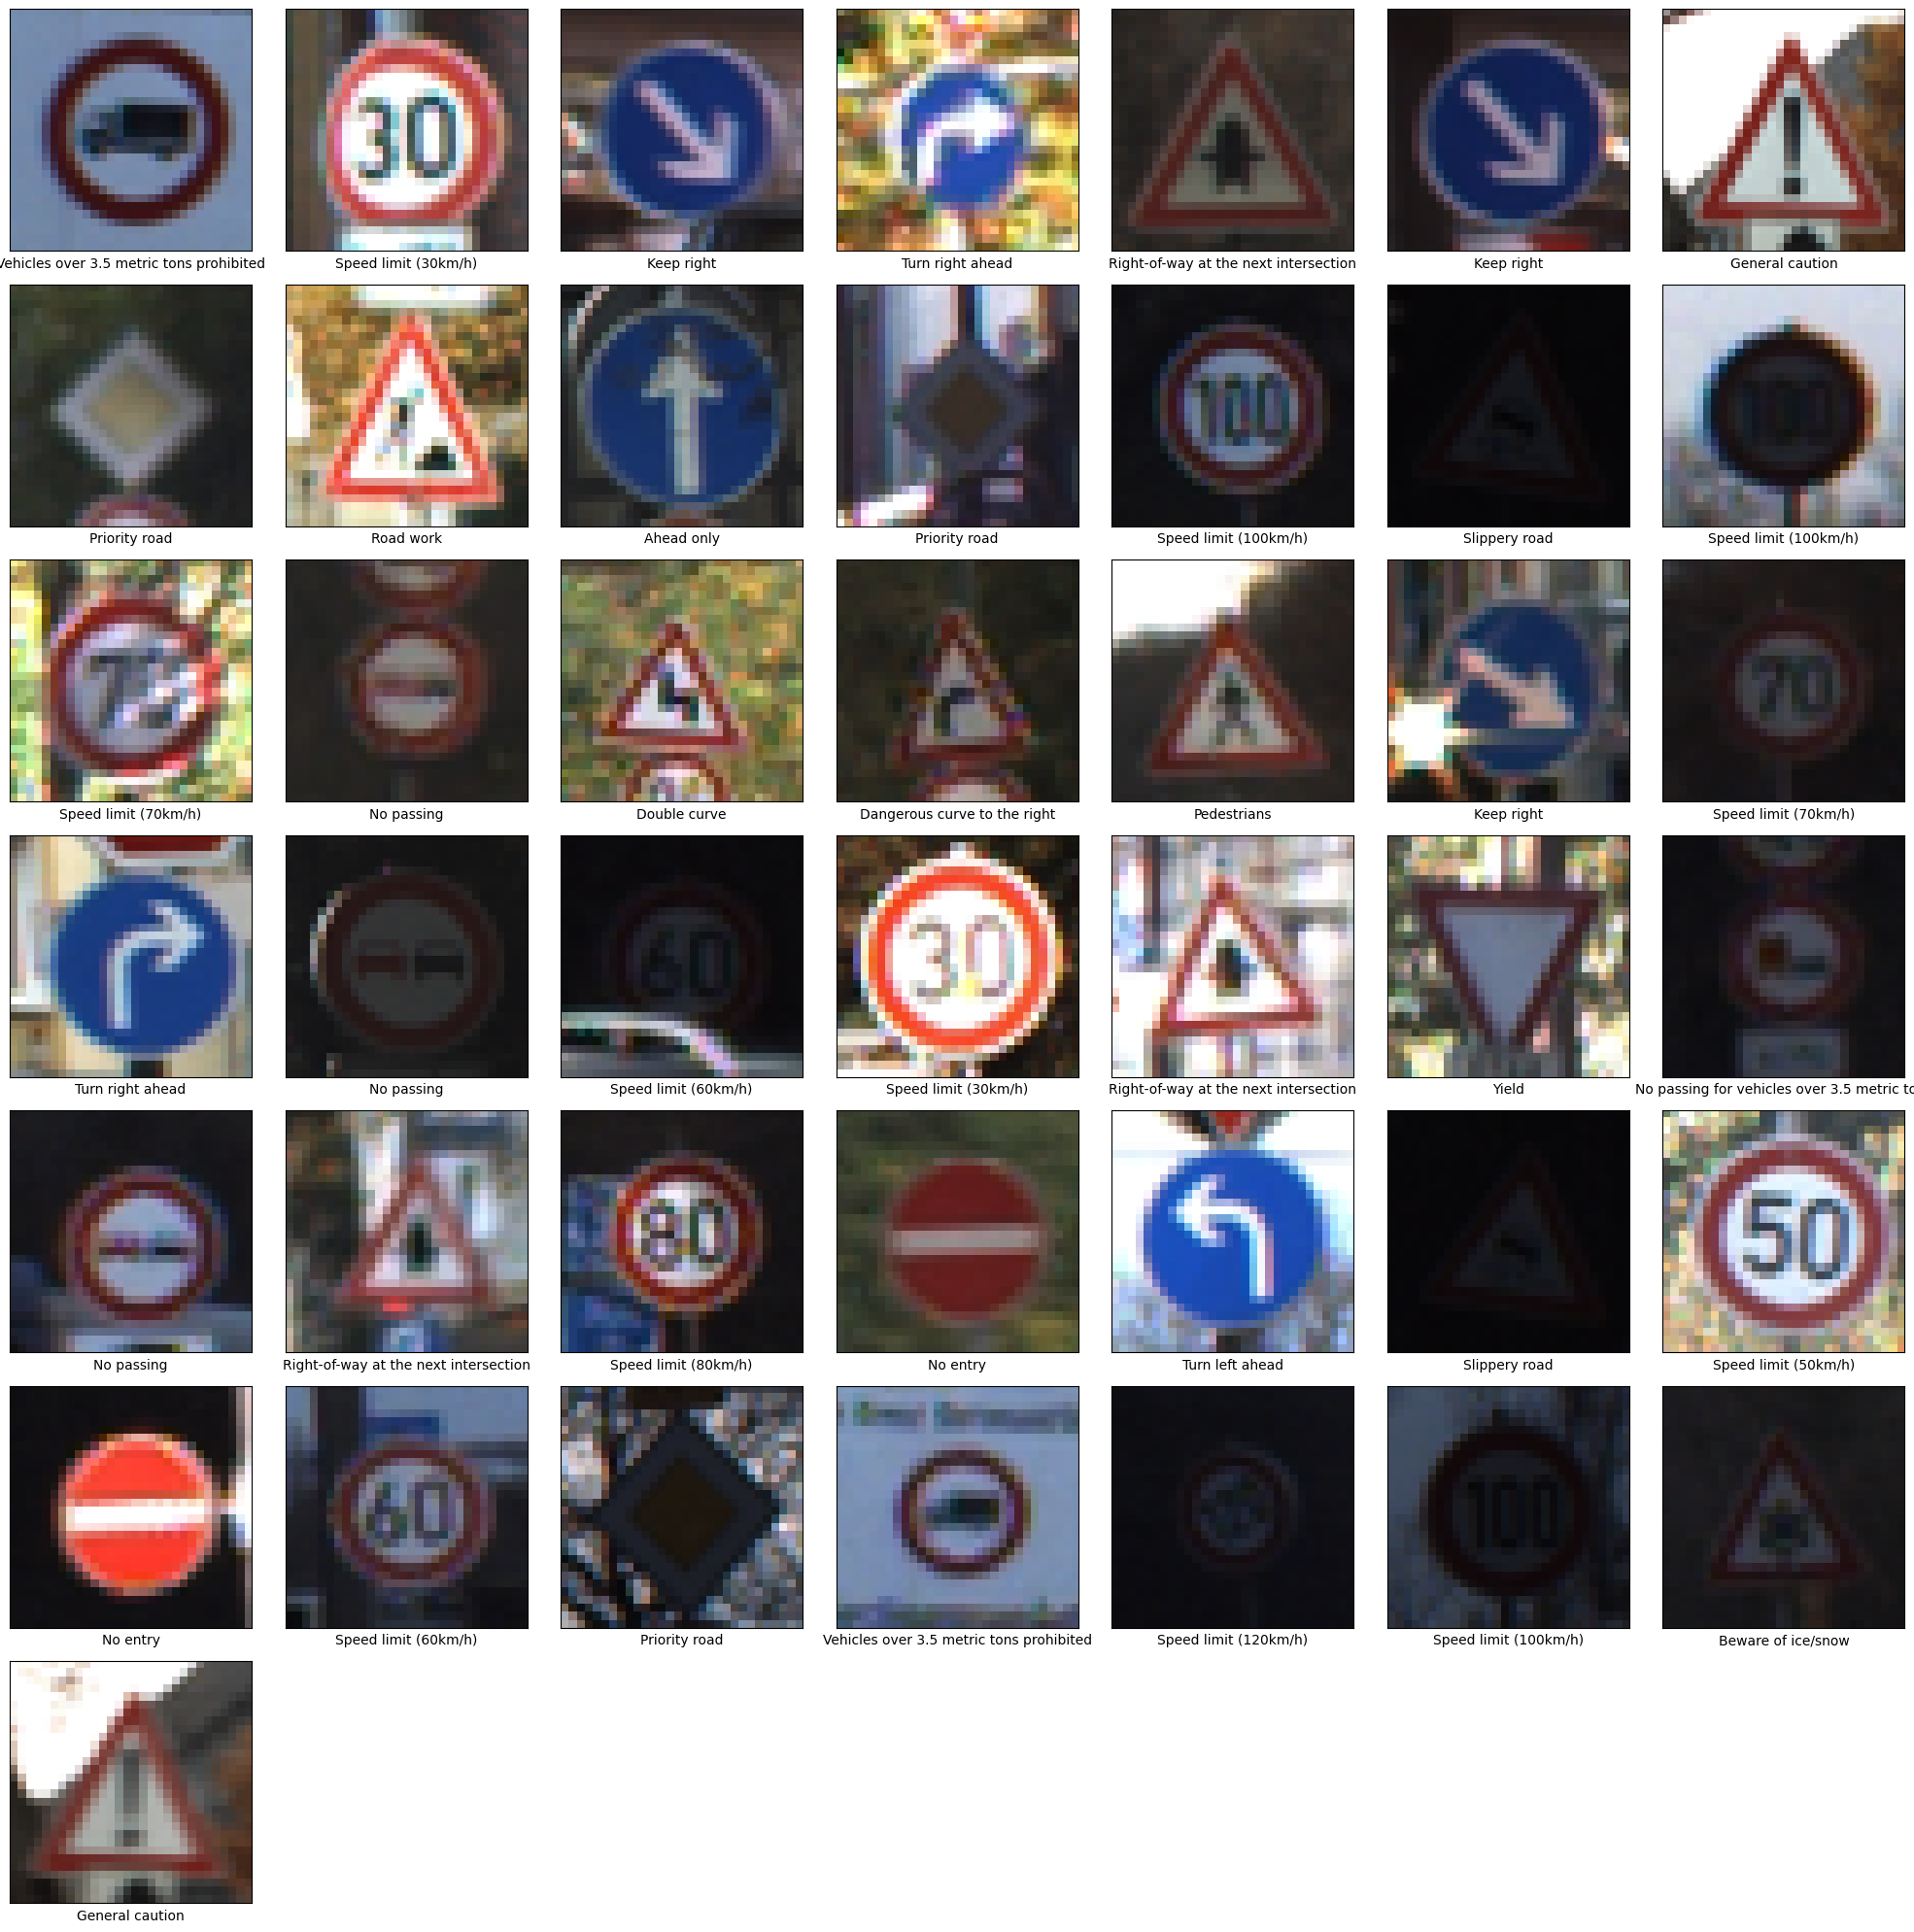

In [11]:
meta_labels = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}

plt.figure(figsize=(10,10))
for i in range(num_classes):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow((X_test[i] ))
    plt.xlabel(meta_labels[test_labels[i]])
    plt.tight_layout(rect=[0,0,2,2])

plt.show()

def show_predictions(images, labels, num=5):
    if len(images) > 0:
        indices = np.random.choice(len(images), num, replace=False)
        for i in indices:
            image=images[i]
            prediction = np.argmax(model.predict(image.reshape(1, 30, 30, 3)))
            predicted_sign_name = meta_labels.get(prediction, "Unknown")
            plt.imshow(image)
            plt.title(f'Actual: {meta_labels[labels[i]]}, Predicted: {predicted_sign_name}')
            plt.axis('off')
            plt.show()



# Display predictions for a few test samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


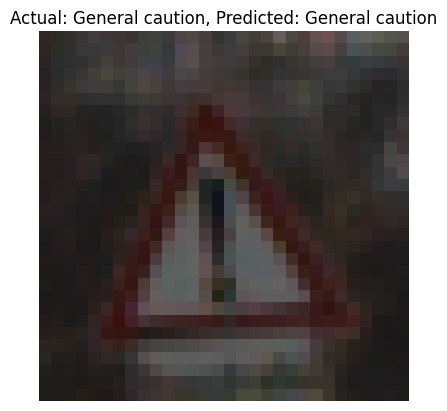

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


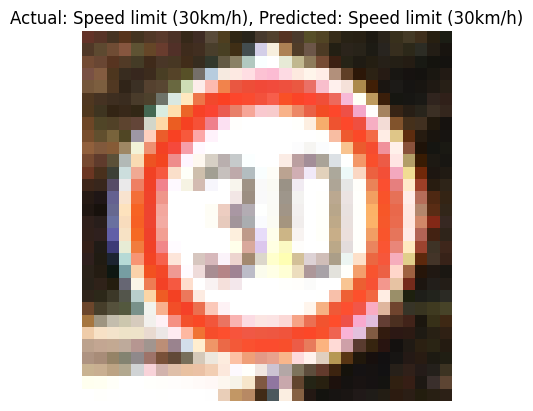

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


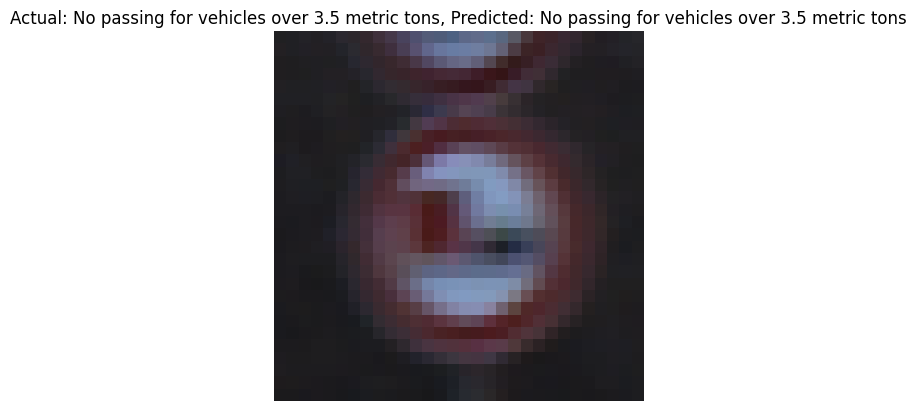

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


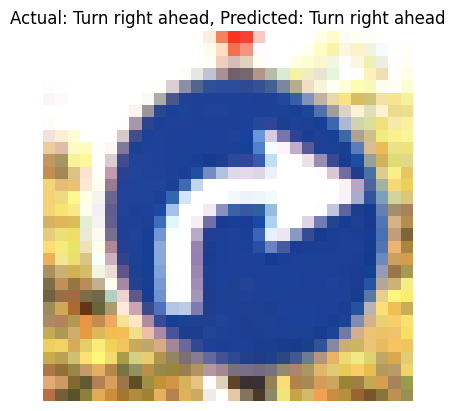

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


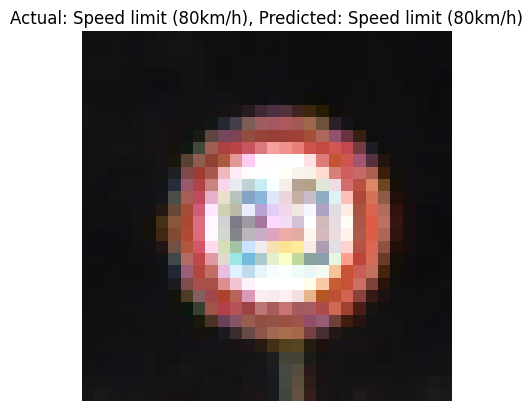

In [14]:
show_predictions(X_test, test_labels)